In [97]:
hateXplain = pd.read_json("/home/mariannettrd/code/irismarechal1997/moder_ia/raw_data/230911_HateXplain.json")

hateXplain_inversed = hateXplain.transpose()

hateXplain=hateXplain_inversed


hateXplain["source"]="230911_HateXplain" # add source of the doc


hateXplain = hateXplain[["post_tokens", "annotators", "source"]].copy()

hateXplain.reset_index(inplace=True, drop=True)

hateXplain["offensive"]=0



In [98]:
hateXplain.head()

,post_tokens,annotators,source,offensive
0,"[i, dont, think, im, getting, my, baby, them, ...","[{'label': 'normal', 'annotator_id': 1, 'targe...",230911_HateXplain,0
1,"[we, cannot, continue, calling, ourselves, fem...","[{'label': 'normal', 'annotator_id': 1, 'targe...",230911_HateXplain,0
2,"[nawt, yall, niggers, ignoring, me]","[{'label': 'normal', 'annotator_id': 4, 'targe...",230911_HateXplain,0
3,"[<user>, i, am, bit, confused, coz, chinese, p...","[{'label': 'hatespeech', 'annotator_id': 1, 't...",230911_HateXplain,0
4,"[this, bitch, in, whataburger, eating, a, burg...","[{'label': 'hatespeech', 'annotator_id': 4, 't...",230911_HateXplain,0


In [99]:
# for i in range(0,len(hateXplain)): 
#     hateXplain.iloc[i,-1]= hateXplain.iloc[i,1][0]["label"]

In [100]:
hateXplain["offensive"]=hateXplain["annotators"].apply(lambda x:x[0]["label"]).apply(lambda x:0 if x =="normal" else 1)
hateXplain["offensive"]

0        0
1        0
2        0
3        1
4        1
        ..
20143    1
20144    1
20145    1
20146    1
20147    1
Name: offensive, Length: 20148, dtype: int64

In [101]:
hateXplain

,post_tokens,annotators,source,offensive
0,"[i, dont, think, im, getting, my, baby, them, ...","[{'label': 'normal', 'annotator_id': 1, 'targe...",230911_HateXplain,0
1,"[we, cannot, continue, calling, ourselves, fem...","[{'label': 'normal', 'annotator_id': 1, 'targe...",230911_HateXplain,0
2,"[nawt, yall, niggers, ignoring, me]","[{'label': 'normal', 'annotator_id': 4, 'targe...",230911_HateXplain,0
3,"[<user>, i, am, bit, confused, coz, chinese, p...","[{'label': 'hatespeech', 'annotator_id': 1, 't...",230911_HateXplain,1
4,"[this, bitch, in, whataburger, eating, a, burg...","[{'label': 'hatespeech', 'annotator_id': 4, 't...",230911_HateXplain,1
...,...,...,...,...
20143,"[if, ur, still, on, twitter, tell, carlton, i,...","[{'label': 'offensive', 'annotator_id': 217, '...",230911_HateXplain,1
20144,"[when, i, first, got, on, here, and, said, i, ...","[{'label': 'offensive', 'annotator_id': 220, '...",230911_HateXplain,1
20145,"[was, macht, der, moslem, wenn, der, zion, geg...","[{'label': 'offensive', 'annotator_id': 206, '...",230911_HateXplain,1
20146,"[it, is, awful, look, at, world, demographics,...","[{'label': 'hatespeech', 'annotator_id': 209, ...",230911_HateXplain,1


## ML for multilabelling

In [102]:
import pandas as pd
import numpy as np
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import hamming_loss

In [103]:
file_path = "/home/mariannettrd/code/irismarechal1997/moder_ia/data/data_classif.csv"
df = pd.read_csv(file_path)

In [104]:
df.columns

Index(['Unnamed: 0', 'text', 'hate_speech_score', 'target_race',
       'target_religion', 'target_origin', 'target_gender_women',
       'target_gender_without_women', 'target_sexuality', 'target_age',
       'target_disability'],
      dtype='object')

In [105]:
df.drop(columns="Unnamed: 0", inplace= True)


In [106]:
df.drop(columns ="hate_speech_score", inplace = True)

In [107]:
df

,text,target_race,target_religion,target_origin,target_gender_women,target_gender_without_women,target_sexuality,target_age,target_disability
0,Yes indeed. She sort of reminds me of the elde...,True,False,False,False,False,False,False,False
1,The trans women reading this tweet right now i...,False,False,False,False,True,False,False,False
2,Question: These 4 broads who criticize America...,False,False,True,False,False,False,False,False
3,It is about time for all illegals to go back t...,False,False,True,False,False,False,False,False
4,For starters bend over the one in pink and kic...,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,False,True,False,False,False,False,False,False
135552,Millions of #Yemen-is participated in mass ral...,True,True,False,False,False,False,False,False
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,False,True,True,False,False,False,False,False
135554,Millions of #Yemen-is participated in mass ral...,False,True,False,False,False,False,False,False


In [108]:
dictrename = {'target_race': 'racism',
              'target_religion': 'religion',
              'target_origin': 'xenophobia',
              'target_gender_women':'misogyny',
              'target_gender_without_women':'transphobia',
              'target_sexuality': 'homophobia',
              'target_age': 'ageism',
              'target_disability':'validism'} 

In [109]:
df.rename(columns={'target_race': 'racism',
              'target_religion': 'religion',
              'target_origin': 'xenophobia',
              'target_gender_women':'misogyny',
              'target_gender_without_women':'transphobia',
              'target_sexuality': 'homophobia',
              'target_age': 'ageism',
              'target_disability':'validism'}, inplace = True )

In [110]:
df

,text,racism,religion,xenophobia,misogyny,transphobia,homophobia,ageism,validism
0,Yes indeed. She sort of reminds me of the elde...,True,False,False,False,False,False,False,False
1,The trans women reading this tweet right now i...,False,False,False,False,True,False,False,False
2,Question: These 4 broads who criticize America...,False,False,True,False,False,False,False,False
3,It is about time for all illegals to go back t...,False,False,True,False,False,False,False,False
4,For starters bend over the one in pink and kic...,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,False,True,False,False,False,False,False,False
135552,Millions of #Yemen-is participated in mass ral...,True,True,False,False,False,False,False,False
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,False,True,True,False,False,False,False,False
135554,Millions of #Yemen-is participated in mass ral...,False,True,False,False,False,False,False,False


In [111]:
for row in ['racism', 'religion', 'xenophobia', 'misogyny', 'transphobia', 'homophobia', 'ageism', 'validism']:
    df[row] = df[row].replace({False: 0, True: 1})

In [112]:
df

,text,racism,religion,xenophobia,misogyny,transphobia,homophobia,ageism,validism
0,Yes indeed. She sort of reminds me of the elde...,1,0,0,0,0,0,0,0
1,The trans women reading this tweet right now i...,0,0,0,0,1,0,0,0
2,Question: These 4 broads who criticize America...,0,0,1,0,0,0,0,0
3,It is about time for all illegals to go back t...,0,0,1,0,0,0,0,0
4,For starters bend over the one in pink and kic...,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,0,1,0,0,0,0,0,0
135552,Millions of #Yemen-is participated in mass ral...,1,1,0,0,0,0,0,0
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,0,1,1,0,0,0,0,0
135554,Millions of #Yemen-is participated in mass ral...,0,1,0,0,0,0,0,0


In [113]:
def cleaning_table(data):
    data = data.drop_duplicates() # Remove duplicates
    data = data.dropna(subset=['offensive']) # Remove n.a. values in columns 'Label' => check column
    return data

In [114]:

def cleaning_table(data):
    data = data.drop_duplicates() # Remove duplicates
    data = data.dropna(subset=['text']) # Remove n.a. values in columns 'Label' => check column
    return data

# Note: no need to Scale the features, Encode features, Perform cyclical engineering

def cleaning_text(sentence: str) -> str:

    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers

    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    tokenized_sentence = word_tokenize(sentence) ## tokenize
    stop_words = set(stopwords.words('english')) ## define stopwords

    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    #remove words
    removed = ["user", "rt"]
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in removed
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v")
        for word in tokenized_sentence_cleaned
    ]

    cleaned_sentence = ' '.join(word for word in lemmatized)

    return cleaned_sentence

In [115]:
data_processed = cleaning_table(df)

In [116]:
data_processed["text_processed"] = data_processed["text"].apply(cleaning_text)

In [117]:
data_processed

,text,racism,religion,xenophobia,misogyny,transphobia,homophobia,ageism,validism,text_processed
0,Yes indeed. She sort of reminds me of the elde...,1,0,0,0,0,0,0,0,yes indeed she sort of remind me of the elder ...
1,The trans women reading this tweet right now i...,0,0,0,0,1,0,0,0,the trans women read this tweet right now be b...
2,Question: These 4 broads who criticize America...,0,0,1,0,0,0,0,0,question these broads who criticize america wh...
3,It is about time for all illegals to go back t...,0,0,1,0,0,0,0,0,it be about time for all illegals to go back t...
4,For starters bend over the one in pink and kic...,0,0,0,1,0,0,0,0,for starters bend over the one in pink and kic...
...,...,...,...,...,...,...,...,...,...,...
135550,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,1,1,0,0,0,0,0,0,abeshinzo realdonaldtrump shinzoabe 独裁者は行きますこれ...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,0,1,0,0,0,0,0,0,عاجل سماحة السيدعبدالملكبدرالدينالحوثي نصره ال...
135552,Millions of #Yemen-is participated in mass ral...,1,1,0,0,0,0,0,0,millions of yemenis participate in mass rally ...
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,0,1,1,0,0,0,0,0,abeshinzo realdonaldtrump shinzoabe 独裁者は行きますこれ...


In [118]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

ModelsPerformance = {}

def metricsReport(modelName, test_labels, predictions):
    accuracy = accuracy_score(test_labels, predictions)

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + modelName + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))
    ModelsPerformance[modelName] = micro_f1

In [120]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

X = data_processed["text"]
y = data_processed.drop(labels=["text_processed", "text"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [121]:
# Pipeline vectorizer + LinearSVC
pipeline = make_pipeline(
    TfidfVectorizer(), 
    OneVsRestClassifier(LinearSVC(), n_jobs=-1))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
svmPreds = pipeline.predict(X_test)
metricsReport("SVC Sq. Hinge Loss", y_test, svmPreds)


/home/mariannettrd/.pyenv/versions/3.10.6/envs/moder_ia/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/mariannettrd/.pyenv/versions/3.10.6/envs/moder_ia/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/mariannettrd/.pyenv/versions/3.10.6/envs/moder_ia/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/mariannettrd/.pyenv/versions/3.10.6/envs/moder_ia/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

------SVC Sq. Hinge Loss Model Metrics-----
Accuracy: 0.3629
Hamming Loss: 0.1214
Precision:
  - Macro: 0.6161
  - Micro: 0.6725
Recall:
  - Macro: 0.4714
  - Micro: 0.5517
F1-measure:
  - Macro: 0.5259
  - Micro: 0.6061


In [122]:
from sklearn.naive_bayes import MultinomialNB
pipeline = make_pipeline(
    TfidfVectorizer(), 
    OneVsRestClassifier(MultinomialNB()))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
svmPreds = pipeline.predict(X_test)
metricsReport("Multinomial NB", y_test, svmPreds)

------Multinomial NB Model Metrics-----
Accuracy: 0.0949
Hamming Loss: 0.1563
Precision:
  - Macro: 0.5451
  - Micro: 0.7547
Recall:
  - Macro: 0.0801
  - Micro: 0.1140
F1-measure:
  - Macro: 0.1362
  - Micro: 0.1981


In [123]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#import tensorflow as tf
#import keras
from tensorflow.keras.utils import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
# import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [124]:
# Split into training and testing data
X = data_processed["text"]
y = data_processed.drop(labels=["text_processed", "text"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

### Let's tokenize the vocabulary
tk = Tokenizer()
tk.fit_on_texts(X_train)
vocab_size = len(tk.word_index)

# We apply the tokenization to the train and test set
X_train_token = tk.texts_to_sequences(X_train)
X_test_token = tk.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

# Size of your embedding space = size of the vector representing each word
embedding_size = 50


# Create the model
model = Sequential()
model.add(layers.Embedding(
    input_dim=vocab_size+1, # size of the input, impacting the number of weights in the linear combinations of the neurons of the first layer
    output_dim=embedding_size, # 100
    mask_zero=True, # Built-in masking layer
))

model.add(layers.GRU(20, return_sequences=True, activation="tanh"))
model.add(layers.GRU(20, activation="tanh"))
model.add(layers.Dense(8, activation="sigmoid"))
model.summary()

model.compile(loss='binary_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])


es = EarlyStopping(patience=4, restore_best_weights=True)

model.fit(X_train_pad, y_train,
        epochs=5,
        batch_size=128,
        callbacks=[es]
        )

res = model.evaluate(X_test_pad, y_test)
print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 50)          2178550   
                                                                 
 gru_2 (GRU)                 (None, None, 20)          4320      
                                                                 
 gru_3 (GRU)                 (None, 20)                2520      
                                                                 
 dense_2 (Dense)             (None, 8)                 168       
                                                                 
Total params: 2185558 (8.34 MB)
Trainable params: 2185558 (8.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
339/339 [==============================] - 53s 139ms/step - loss: 0.4418 - accuracy: 0.3013
Epoch 2/5
339/339 [===========================

In [125]:
from keras.layers import Embedding

# Split into training and testing data
X = data_processed["text"]
y = data_processed.drop(labels=["text_processed", "text"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

### Let's tokenize the vocabulary
tk = Tokenizer()
tk.fit_on_texts(X_train)
vocab_size = len(tk.word_index)

# We apply the tokenization to the train and test set
X_train_token = tk.texts_to_sequences(X_train)
X_test_token = tk.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

# Size of your embedding space = size of the vector representing each word
embedding_size = 50

# create the model
max_review_length = 600

embedding_vector_length = 32
cnn_model = Sequential()


cnn_model.add(Embedding(input_dim=vocab_size+1, output_dim=embedding_size))   
cnn_model.add(layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(layers.MaxPooling1D(pool_size=2))
cnn_model.add(layers.LSTM(100))
cnn_model.add(layers.Dense(8, activation='sigmoid'))

# Students will be ending their code here

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

es = EarlyStopping(patience=4, restore_best_weights=True)

history_c =model.fit(X_train_pad, y_train,
        epochs=5,
        batch_size=128,
        callbacks=[es]
        )
res = model.evaluate(X_test_pad, y_test)
print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 50)          2178550   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          4832      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 32)          0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 8)                 808       
                                                                 
Total params: 2237390 (8.53 MB)
Trainable params: 2237390 (8.53 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [126]:
train_predictions = model.predict(X_train_pad)
test_predictions = model.predict(X_test_pad)

451/451 [==============================] - 12s 24ms/step


In [127]:
X_train_pad

array([[3.500e+01, 1.000e+00, 2.396e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.148e+03, 6.800e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 1.450e+03, 6.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [8.307e+03, 2.300e+01, 1.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.370e+02, 1.300e+01, 8.919e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.850e+02, 1.300e+01, 4.667e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)

## One model

In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = "/home/mariannettrd/code/irismarechal1997/moder_ia/data/labelling_dataset_v1.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,text,racism,religion,xenophobia,misogyny,transphobia,homophobia,text_processed
0,Yes indeed. She sort of reminds me of the elde...,1,0,0,0,0,0,yes indeed she sort of remind me of the elder ...
1,The trans women reading this tweet right now i...,0,0,0,0,1,0,the trans women read this tweet right now be b...
2,Question: These 4 broads who criticize America...,0,0,1,0,0,0,question these broads who criticize america wh...
3,It is about time for all illegals to go back t...,0,0,1,0,0,0,it be about time for all illegals to go back t...
4,For starters bend over the one in pink and kic...,0,0,0,1,0,0,for starters bend over the one in pink and kic...


In [4]:
labelled_data = pd.read_csv("/home/mariannettrd/code/irismarechal1997/moder_ia/data/labelling_dataset_v1.csv")
labelled_data.head()

,text,racism,religion,xenophobia,misogyny,transphobia,homophobia,text_processed
0,Yes indeed. She sort of reminds me of the elde...,1,0,0,0,0,0,yes indeed she sort of remind me of the elder ...
1,The trans women reading this tweet right now i...,0,0,0,0,1,0,the trans women read this tweet right now be b...
2,Question: These 4 broads who criticize America...,0,0,1,0,0,0,question these broads who criticize america wh...
3,It is about time for all illegals to go back t...,0,0,1,0,0,0,it be about time for all illegals to go back t...
4,For starters bend over the one in pink and kic...,0,0,0,1,0,0,for starters bend over the one in pink and kic...


In [5]:
label = np.zeros(56515, dtype=np.int8 )
list_1 = label.tolist()
labelled_data.insert(1,"non-offensive",list_1)

In [6]:
labelled_data.head()

,text,non-offensive,racism,religion,xenophobia,misogyny,transphobia,homophobia,text_processed
0,Yes indeed. She sort of reminds me of the elde...,0,1,0,0,0,0,0,yes indeed she sort of remind me of the elder ...
1,The trans women reading this tweet right now i...,0,0,0,0,0,1,0,the trans women read this tweet right now be b...
2,Question: These 4 broads who criticize America...,0,0,0,1,0,0,0,question these broads who criticize america wh...
3,It is about time for all illegals to go back t...,0,0,0,1,0,0,0,it be about time for all illegals to go back t...
4,For starters bend over the one in pink and kic...,0,0,0,0,1,0,0,for starters bend over the one in pink and kic...


(   racism  religion  xenophobia  misogyny  non-offensive  transphobia  \
 0   18429      9166       11582     14195              0         9628   
 
    validism  
 0     11026  ,
 <Axes: >)

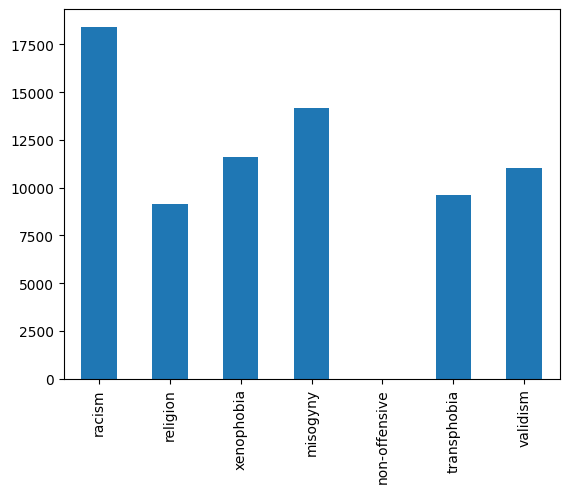

In [7]:
val_df=pd.DataFrame([
    {"racism":len(labelled_data[labelled_data["racism"]==1]),
       "religion":len(labelled_data[labelled_data["religion"]==1]),
       "xenophobia":len(labelled_data[labelled_data["xenophobia"]==1]),
       "misogyny":len(labelled_data[labelled_data["misogyny"]==1]),
     "non-offensive":len(labelled_data[labelled_data["non-offensive"]==1]),
       "transphobia":len(labelled_data[labelled_data["transphobia"]==1]),
       "validism":len(labelled_data[labelled_data["homophobia"]==1])}])
val_df, val_df.iloc[0].plot(kind="bar")

In [8]:
df = pd.read_csv("/home/mariannettrd/code/irismarechal1997/moder_ia/data/processed_dataset_v1.csv")

In [9]:
df.head()

,source,text,offensive,text_processed
0,Hate_Speech_Classification_01,dalits are lowlives,1,dalits be lowlives
1,Hate_Speech_Classification_01,gay people are a burden to our society,1,gay people be a burden to our society
2,Hate_Speech_Classification_01,Arabs are not welcome,1,arabs be not welcome
3,Hate_Speech_Classification_01,I'm not saying we should actually eliminate he...,1,im not say we should actually eliminate heebs ...
4,Hate_Speech_Classification_01,bananas are for black people,1,bananas be for black people


In [25]:
#select number of tweets
number_rows = 10_000

#filter on non-offensive
df2 = df[df["offensive"]==0]
sample_df=df2.sample(number_rows)

#select right columns to keep
selected_features = ["text","offensive", "text_processed"]
new_df = sample_df[selected_features].copy()
label = np.zeros(number_rows, dtype=np.int8 )
list_2 = label.tolist()


In [26]:
new_df.head()

,text,offensive,text_processed
52326,I'm Pregnant Charlie Brown! #WorstPeanutsSpeci...,0,im pregnant charlie brown worstpeanutsspecialever
156557,@brockwellswim @EventBrockwell @Brockwell_Lido...,0,brockwellswim eventbrockwell brockwelllido bri...
115354,@Guentzelvania20 @tdthursty @mattei1414 @Sport...,0,guentzelvania tdthursty mattei sportsnet tblig...
113564,"I had to start from scratch, but it’s ok becau...",0,i have to start from scratch but it ’ s ok bec...
143249,Please take a look at our @EducationDivB notic...,0,please take a look at our educationdivb notice...


In [27]:
labelled_data.head()
labelled_data.columns

Index(['text', 'non-offensive', 'racism', 'religion', 'xenophobia', 'misogyny',
       'transphobia', 'homophobia', 'text_processed'],
      dtype='object')

In [28]:
label = np.zeros(number_rows, dtype=np.int8 )
list_2 = label.tolist()

In [29]:
new_df

,text,offensive,text_processed
52326,I'm Pregnant Charlie Brown! #WorstPeanutsSpeci...,0,im pregnant charlie brown worstpeanutsspecialever
156557,@brockwellswim @EventBrockwell @Brockwell_Lido...,0,brockwellswim eventbrockwell brockwelllido bri...
115354,@Guentzelvania20 @tdthursty @mattei1414 @Sport...,0,guentzelvania tdthursty mattei sportsnet tblig...
113564,"I had to start from scratch, but it’s ok becau...",0,i have to start from scratch but it ’ s ok bec...
143249,Please take a look at our @EducationDivB notic...,0,please take a look at our educationdivb notice...
...,...,...,...
26249,You naughty kids are a plague on earth sent by...,0,you naughty kid be a plague on earth send by s...
122028,@TG22110 @realDonaldTrump OMG 😂🤣 That’s beyond...,0,tg realdonaldtrump omg 😂🤣 that ’ s beyond perfect
96207,son i fucking hate being single 😂,0,son i fuck hate be single 😂
154227,"i promise, the next pinned tweet you’ll see is...",0,i promise the next pin tweet you ’ ll see be o...


In [30]:
# Create a new DataFrame based on sample_df
new_df = sample_df[selected_features].copy()

# Define the columns you want to insert
# columns = ['non-offensive', 'racism', 'religion', 'xenophobia', 'misogyny', 'transphobia', 'homophobia']
columns= ['homophobia', 'transphobia', 'misogyny', 'xenophobia', 'religion', 'racism', 'non-offensive']
# Iterate through the columns and insert them into new_df
for col in columns:
    new_df.insert(1, col, list_2)

new_df["non-offensive"]=1
new_df.drop(columns="offensive", inplace = True)

In [31]:

new_df

,text,non-offensive,racism,religion,xenophobia,misogyny,transphobia,homophobia,text_processed
52326,I'm Pregnant Charlie Brown! #WorstPeanutsSpeci...,1,0,0,0,0,0,0,im pregnant charlie brown worstpeanutsspecialever
156557,@brockwellswim @EventBrockwell @Brockwell_Lido...,1,0,0,0,0,0,0,brockwellswim eventbrockwell brockwelllido bri...
115354,@Guentzelvania20 @tdthursty @mattei1414 @Sport...,1,0,0,0,0,0,0,guentzelvania tdthursty mattei sportsnet tblig...
113564,"I had to start from scratch, but it’s ok becau...",1,0,0,0,0,0,0,i have to start from scratch but it ’ s ok bec...
143249,Please take a look at our @EducationDivB notic...,1,0,0,0,0,0,0,please take a look at our educationdivb notice...
...,...,...,...,...,...,...,...,...,...
26249,You naughty kids are a plague on earth sent by...,1,0,0,0,0,0,0,you naughty kid be a plague on earth send by s...
122028,@TG22110 @realDonaldTrump OMG 😂🤣 That’s beyond...,1,0,0,0,0,0,0,tg realdonaldtrump omg 😂🤣 that ’ s beyond perfect
96207,son i fucking hate being single 😂,1,0,0,0,0,0,0,son i fuck hate be single 😂
154227,"i promise, the next pinned tweet you’ll see is...",1,0,0,0,0,0,0,i promise the next pin tweet you ’ ll see be o...


In [32]:
labelled_data.head()

,text,non-offensive,racism,religion,xenophobia,misogyny,transphobia,homophobia,text_processed
0,Yes indeed. She sort of reminds me of the elde...,0,1,0,0,0,0,0,yes indeed she sort of remind me of the elder ...
1,The trans women reading this tweet right now i...,0,0,0,0,0,1,0,the trans women read this tweet right now be b...
2,Question: These 4 broads who criticize America...,0,0,0,1,0,0,0,question these broads who criticize america wh...
3,It is about time for all illegals to go back t...,0,0,0,1,0,0,0,it be about time for all illegals to go back t...
4,For starters bend over the one in pink and kic...,0,0,0,0,1,0,0,for starters bend over the one in pink and kic...


In [33]:
data_set= pd.concat([labelled_data, new_df])

In [34]:
data_set.head()

,text,non-offensive,racism,religion,xenophobia,misogyny,transphobia,homophobia,text_processed
0,Yes indeed. She sort of reminds me of the elde...,0,1,0,0,0,0,0,yes indeed she sort of remind me of the elder ...
1,The trans women reading this tweet right now i...,0,0,0,0,0,1,0,the trans women read this tweet right now be b...
2,Question: These 4 broads who criticize America...,0,0,0,1,0,0,0,question these broads who criticize america wh...
3,It is about time for all illegals to go back t...,0,0,0,1,0,0,0,it be about time for all illegals to go back t...
4,For starters bend over the one in pink and kic...,0,0,0,0,1,0,0,for starters bend over the one in pink and kic...


In [35]:
# Split into training and testing data
X = data_set["text"]
y = data_set.drop(labels=["text_processed", "text"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

### Let's tokenize the vocabulary
tk = Tokenizer()
tk.fit_on_texts(X_train)
vocab_size = len(tk.word_index)

# We apply the tokenization to the train and test set
X_train_token = tk.texts_to_sequences(X_train)
X_test_token = tk.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

# Size of your embedding space = size of the vector representing each word
embedding_size = 50


# Create the model
model = Sequential()
model.add(layers.Embedding(
    input_dim=vocab_size+1, # size of the input, impacting the number of weights in the linear combinations of the neurons of the first layer
    output_dim=embedding_size, # 100
    mask_zero=True, # Built-in masking layer
))

model.add(layers.GRU(20, return_sequences=True, activation="tanh"))
model.add(layers.GRU(20, activation="tanh"))
model.add(layers.Dense(7, activation="sigmoid"))
model.summary()

model.compile(loss='binary_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])


es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train_pad, y_train,
        epochs=150,
        batch_size=128,
        callbacks=[es], validation_split=0.3
        )

res = model.evaluate(X_test_pad, y_test)
print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

NameError: name 'train_test_split' is not defined

In [1]:
def full_model_classif():

    labelled_data = pd.read_csv("/home/mariannettrd/code/irismarechal1997/moder_ia/data/labelling_dataset_v1.csv")
    label = np.zeros(56515, dtype=np.int8 )
    list_1 = label.tolist()
    labelled_data.insert(1,"non-offensive",list_1)

    file_path = "/home/mariannettrd/code/irismarechal1997/moder_ia/data/processed_dataset_v1.csv"
    df = pd.read_csv(file_path)
    print(df.columns)
    print(df.head())

    #select number of tweets
    number_rows = 10_000

    #filter on non-offensive
    df2 = df[df["offensive"]==0]
    sample_df=df2.sample(number_rows)

    #select right columns to keep
    selected_features = ["text","offensive", "text_processed"]
    new_df = sample_df[selected_features].copy()
    label = np.zeros(number_rows, dtype=np.int8 )
    list_2 = label.tolist()

    # Define the columns you want to insert
    columns= ['homophobia', 'transphobia', 'misogyny', 'xenophobia', 'religion', 'racism', 'non-offensive']

    # Iterate through the columns and insert them into new_df
    for col in columns:
        new_df.insert(1, col, list_2)
    new_df["non-offensive"]=1
    new_df.drop(columns="offensive", inplace = True)

    data_set= pd.concat([labelled_data, new_df])

    # Split into training and testing data
    X = data_set["text_processed"]
    y = data_set.drop(labels=["text_processed", "text"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

    ### Let's tokenize the vocabulary
    tk = Tokenizer()
    tk.fit_on_texts(X_train)
    vocab_size = len(tk.word_index)

    # We apply the tokenization to the train and test set
    X_train_token = tk.texts_to_sequences(X_train)
    X_test_token = tk.texts_to_sequences(X_test)

    X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
    X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

    # Size of your embedding space = size of the vector representing each word
    embedding_size = 50


    # Create the model
    model = Sequential()
    model.add(layers.Embedding(
        input_dim=vocab_size+1, # size of the input, impacting the number of weights in the linear combinations of the neurons of the first layer
        output_dim=embedding_size, # 100
        mask_zero=True, # Built-in masking layer
    ))

    model.add(layers.GRU(20, return_sequences=True, activation="tanh"))
    model.add(layers.GRU(20, activation="tanh"))
    model.add(layers.Dense(7, activation="sigmoid"))
    model.summary()

    model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


    es = EarlyStopping(patience=10, restore_best_weights=True)

    model.fit(X_train_pad, y_train,
            epochs=150,
            batch_size=128,
            callbacks=[es], validation_split=0.3
            )

    res = model.evaluate(X_test_pad, y_test)
    print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

    return model


In [21]:
full_model_classif()

Index(['source', 'text', 'offensive', 'text_processed'], dtype='object')
                          source  \
0  Hate_Speech_Classification_01   
1  Hate_Speech_Classification_01   
2  Hate_Speech_Classification_01   
3  Hate_Speech_Classification_01   
4  Hate_Speech_Classification_01   

                                                text  offensive  \
0                                dalits are lowlives          1   
1             gay people are a burden to our society          1   
2                              Arabs are not welcome          1   
3  I'm not saying we should actually eliminate he...          1   
4                       bananas are for black people          1   

                                      text_processed  
0                                 dalits be lowlives  
1              gay people be a burden to our society  
2                               arabs be not welcome  
3  im not say we should actually eliminate heebs ...  
4                        bananas

NameError: name 'train_test_split' is not defined